## Overview

This is a real commercial dataset was  provided by Olist, the largest department store in Brazilian marketplaces, that has been anonymized.

Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. 

Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. 

## Data

The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. 

Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. 

There is also geolocation dataset that relates Brazilian zip codes to lat/lng coordinates. 

## Attention

An order might have multiple items.
Each item might be fulfilled by a distinct seller.
All text identifying stores and partners where replaced by the names of Game of Thrones great houses.


## Project Goals

NLP:
This dataset offers a supreme environment to parse out the reviews text through its multiple dimensions.

Clustering:
Some customers didn't write a review. But why are they happy or mad?

Sales Prediction:
With purchase date information you'll be able to predict future sales.

Delivery Performance:
You will also be able to work through delivery performance and find ways to optimize delivery times.

Product Quality:
Enjoy yourself discovering the products categories that are more prone to customer insatisfaction.

Feature Engineering:
Create features from this rich dataset or attach some external public information to it.

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Datasets/olist_customers_dataset.csv')

In [3]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
products = pd.read_csv('Datasets/olist_products_dataset.csv')

In [5]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
products.set_index('product_id')

,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_id,,,,,,,,
1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0


In [7]:
geo = pd.read_csv('Datasets/olist_geolocation_dataset.csv')

In [8]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [9]:
reviews = pd.read_csv('Datasets/olist_order_reviews_dataset.csv')
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
reviews.set_index('order_id')

,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
order_id,,,,,,
73fc7af87114b39712e6da79b0a377eb,7bc2406110b926393aa56f80a40eba40,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
a548910a1c6147796b98fdf73dbeba33,80e641a11e56f04c1ad469d5645fdfde,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
f9e4b658b201a9f2ecdecbb34bed034b,228ce5500dc1d8e020d8d1322874b6f0,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
658677c97b385a9be170737859d3511b,e64fb393e7b32834bb789ff8bb30750e,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
8e6bfb81e283fa7e4f11123a3fb894f1,f7c4243c7fe1938f181bec41a392bdeb,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
b18dcdf73be66366873cd26c5724d1dc,15197aa66ff4d0650b5434f1b46cda19,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
e48aa0d2dcec3a2e87348811bcfdf22b,07f9bee5d1b850860defd761afa7ff16,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
c31a859e34e3adac22f376954e19b39d,7c6400515c67679fbee952a7525281ef,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
9c214ac970e84273583ab523dfafd09b,a3f6f7f6f433de0aefbb97da197c554c,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37


In [11]:
reviews['review_score'].value_counts().sort_index()

1    11858
2     3235
3     8287
4    19200
5    57420
Name: review_score, dtype: int64

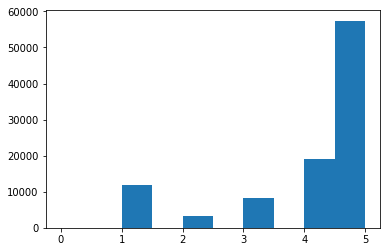

In [12]:
fig, ax = plt.subplots()
ax.hist(reviews['review_score'], range = (0,5))
plt.show()

In [13]:
orders = pd.read_csv('Datasets/olist_orders_dataset.csv')

orders.set_index('order_id')

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_id,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00


In [14]:
orders['review_score'] = reviews['review_score']

In [15]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,5
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,5
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,5


In [16]:
order_items = pd.read_csv('Datasets/olist_order_items_dataset.csv')
order_items.head()
print(len(order_items))

112650


In [17]:
product_names = pd.read_csv('Datasets/product_category_name_translation.csv')
product_names.head()
product_names.set_index('product_category_name')

,product_category_name_english
product_category_name,
beleza_saude,health_beauty
informatica_acessorios,computers_accessories
automotivo,auto
cama_mesa_banho,bed_bath_table
moveis_decoracao,furniture_decor
esporte_lazer,sports_leisure
perfumaria,perfumery
utilidades_domesticas,housewares
telefonia,telephony


In [18]:
order_items.set_index('order_id')

,order_item_id,product_id,seller_id,price,freight_value
order_id,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14
00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,21.90,12.69
00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,19.90,11.85
000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,810.00,70.75
0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,145.95,11.65


In [19]:
order_items['review_score'] = reviews['review_score']

In [20]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,4.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,5.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,5.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,5.0


In [21]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
order_id         112650 non-null object
order_item_id    112650 non-null int64
product_id       112650 non-null object
seller_id        112650 non-null object
price            112650 non-null float64
freight_value    112650 non-null float64
review_score     100000 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 6.0+ MB


In [22]:
order_items.set_index('product_id')

,order_id,order_item_id,seller_id,price,freight_value,review_score
product_id,,,,,,
4244733e06e7ecb4970a6e2683c13e61,00010242fe8c5a6d1ba2dd792cb16214,1,48436dade18ac8b2bce089ec2a041202,58.90,13.29,4.0
e5f2d52b802189ee658865ca93d83a8f,00018f77f2f0320c557190d7a144bdd3,1,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,5.0
c777355d18b72b67abbeef9df44fd0fd,000229ec398224ef6ca0657da4fc703e,1,5b51032eddd242adc84c38acab88f23d,199.00,17.87,5.0
7634da152a4610f1595efa32f14722fc,00024acbcdf0a6daa1e931b038114c75,1,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,5.0
ac6c3623068f30de03045865e4e10089,00042b26cf59d7ce69dfabb4e55b4fd9,1,df560393f3a51e74553ab94004ba5c87,199.90,18.14,5.0
ef92defde845ab8450f9d70c526ef70f,00048cc3ae777c65dbb7d2a0634bc1ea,1,6426d21aca402a131fc0a5d0960a3c90,21.90,12.69,1.0
8d4f2bb7e93e6710a28f34fa83ee7d28,00054e8431b9d7675808bcb819fb4a32,1,7040e82f899a04d1b434b795a43b4617,19.90,11.85,5.0
557d850972a7d6f792fd18ae1400d9b6,000576fe39319847cbb9d288c5617fa6,1,5996cddab893a4652a15592fb58ab8db,810.00,70.75,5.0
310ae3c140ff94b03219ad0adc3c778f,0005a1a1728c9d785b8e2b08b904576c,1,a416b6a846a11724393025641d4edd5e,145.95,11.65,5.0


In [23]:
order_items['product_cat_name_sp'] = order_items['product_id'].map(products.set_index('product_id')['product_category_name'])

In [24]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,review_score,product_cat_name_sp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,4.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,5.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,5.0,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,5.0,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,5.0,ferramentas_jardim


In [25]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
order_id               112650 non-null object
order_item_id          112650 non-null int64
product_id             112650 non-null object
seller_id              112650 non-null object
price                  112650 non-null float64
freight_value          112650 non-null float64
review_score           100000 non-null float64
product_cat_name_sp    111047 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 6.9+ MB


In [26]:
order_items['product_cat_name_en'] = order_items['product_cat_name_sp'].map(product_names.set_index('product_category_name')['product_category_name_english'])

In [27]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 9 columns):
order_id               112650 non-null object
order_item_id          112650 non-null int64
product_id             112650 non-null object
seller_id              112650 non-null object
price                  112650 non-null float64
freight_value          112650 non-null float64
review_score           100000 non-null float64
product_cat_name_sp    111047 non-null object
product_cat_name_en    111023 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 7.7+ MB


In [28]:
# Create an aggregation
avg_score_per_category = order_items.groupby('product_cat_name_en', as_index=False).agg({'review_score': ['count', 'mean']})
avg_score_per_category.columns = ['product_category_name', 'count', 'mean']

# Filter to show only categories with more than 50 reviews
avg_score_per_category = avg_score_per_category[avg_score_per_category['count'] > 100]
avg_score_per_category = avg_score_per_category.sort_values(by='mean', ascending=False)
avg_score_per_category

,product_category_name,count,mean
37,food_drink,247,4.275304
12,christmas_supplies,130,4.238462
34,fixed_telephony,242,4.227273
44,home_appliances,685,4.208759
30,fashion_male_clothing,118,4.203390
8,books_general_interest,491,4.150713
51,kitchen_dining_laundry_garden_furniture,248,4.133065
45,home_appliances_2,218,4.114679
42,garden_tools,3900,4.111026
18,construction_tools_lights,274,4.109489


Text(0.5,1,'Categories Review Score')

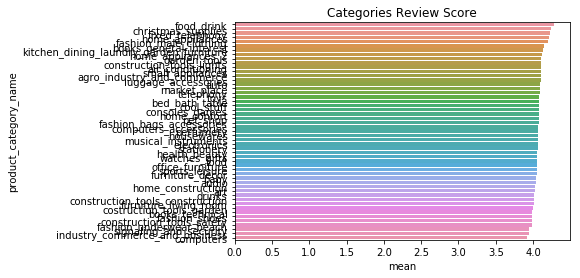

In [29]:
ax = sns.barplot(x="mean", y="product_category_name", data=avg_score_per_category)
ax.set_title('Categories Review Score')